# 数据增强

<img src="./pic/数据增强.PNG" width=400 height=400>

## 使用增强数据训练

- 在线生成，随机做增强。作用在训练上，相当与做正则
<img src="./pic/使用增强数据训练.PNG" width=400 height=400>

## 翻转
- 上下翻转不总是可行，取决于数据的样子
    - 建筑不行
    - 树叶可行
<img src="./pic/翻转.PNG" width=400 height=400>

## 切割
- 随机高宽比：在3/4与4/3之间随机取一个数，这个数是切的高宽比
- 随机大小：在8%与100%之间随机取一个数，这个值是切的这一块占原始图片的百分比
<img src="./pic/切割.PNG" width=400 height=400>

## 颜色
<img src="./pic/颜色.PNG" width=400 height=400>

## 几十种其他变化
<img src="./pic/其他变化.PNG" width=400 height=400>
https://github.com/aleju/imgaug


## 从测试集可能存在的样本，反推训练集所需要的数据增强



## 总结
- 数据增广通过变形数据来获取多样性而使得模型泛化性能更好
- 常见图片增广包括翻转、切割、变色

# 代码实现

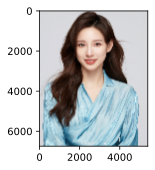

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

d2l.set_figsize()
img = d2l.Image.open('./pic/mfs.jpg')
d2l.plt.imshow(img)

In [30]:
# 转化成tensor
img_tensor = torchvision.transforms.ToTensor()(img)
print(img_tensor.shape)

torch.Size([3, 6746, 5397])


In [2]:
# aug: 图片增广的办法
# 生成8张图片，2行，4列
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

- 在水平方向随机旋转 `RandomHorizontalFlip`
    -  50%保持不变，50%翻转

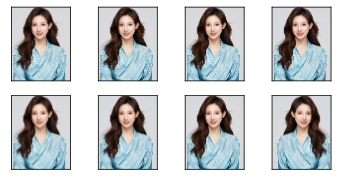

In [3]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

- 在上下方向随机旋转 `RandomVerticalFlip`
    - 50%保持不变，50%翻转

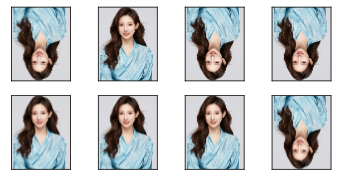

In [4]:
apply(img, torchvision.transforms.RandomVerticalFlip())

- RandomResizedCrop 随机剪裁
    - size：输出的分辨率，就是输出的大小
    - scale：设置剪裁的大小区间：占图像的百分比。默认crop出来的图片会在0.08倍到1倍之间
    - ratio：设置高宽比：crop框的高宽比
    - scale和ratio值越小，增广的幅度变低

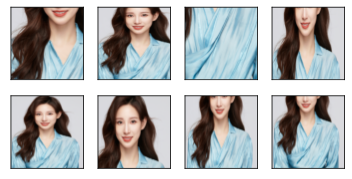

In [10]:
shape_aug = torchvision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

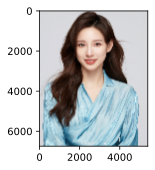

In [23]:
d2l.plt.imshow(img)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

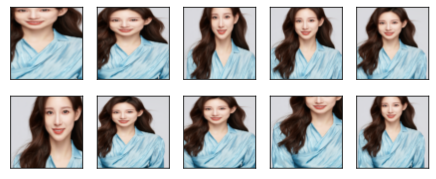

In [43]:
# shape_aug1 = torchvision.transforms.RandomResizedCrop(200, scale=(0.01, 0.8))

shape_aug1 = torchvision.transforms.RandomResizedCrop(200, ratio=(0.5, 2))
shape_aug1 = [shape_aug1(img)for _ in range(10)]
d2l.show_images(shape_aug1,num_rows=2,num_cols=5)

# shape_aug1 = shape_aug1(img)
# shape_aug1

### 改变颜色
- 随机更改图像的亮度`ColorJitter`
    - brightness：上下50%，增50%亮度和减少50%亮度
    - 饱和度、对比度、色调不变

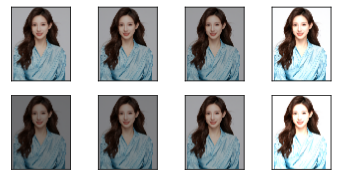

In [6]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

- 随机更改图像的色调
    - hue: 50%
    - 亮度、对比度、饱和度不变

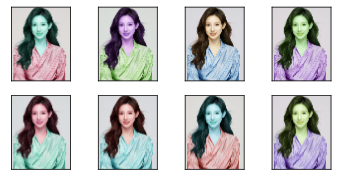

In [7]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

- 随机更改图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）

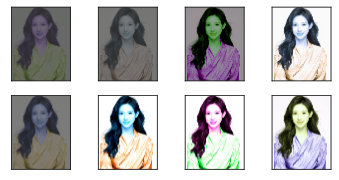

In [8]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 结合多种图像增广方法
`Compose`

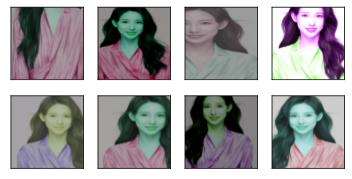

In [9]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

## 使用图像增广进行训练

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

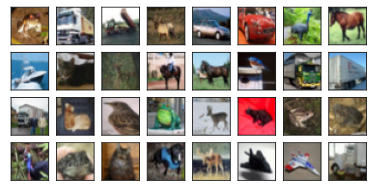

In [10]:
all_images = torchvision.datasets.CIFAR10(train=True, root="./data", download=False)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8)

## 只使用最简单的随机左右翻转
- 使用ToTensor实例将一批图像转换为深度学习框架所要求的格式，即形状为（批量大小，通道数，高度，宽度）的32位浮点数，取值范围为0到1

In [13]:
# 还可以做resize，颜色的变换
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

# 测试集没做增广，只是把数据转为tensor型
test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])

## 定义一个辅助函数，以便于读取图像和应用图像增广

- `transform=augs`将上面定义的增广方式，直接apply上去

In [25]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="./data", train=is_train,
                                           transform=augs, download=False)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                    shuffle=is_train, num_workers=6)    # d2l.get_dataloader_workers() = 6核cpu
    return dataloader

## 定义一个函数，使用多GPU对模型进行训练和评估

In [26]:
def train_batch_ch13(net, X, y, loss, trainer, devices):
    """用多GPU进行小批量训练"""
    if isinstance(X, list):    # 如果是list，则一个一个copy
        # 微调BERT中所需（稍后讨论）
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])   # 否则，直接copy
    y = y.to(devices[0])
    net.train()    # training mode
    trainer.zero_grad()    # 梯度清0
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()    # update training
    train_loss_sum = l.sum()
    train_acc_sum = d2l.accuracy(pred, y)
    return train_loss_sum, train_acc_sum


def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices=d2l.try_all_gpus()):
    """用多GPU进行模型训练"""
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1], legend=['train loss', 'train acc', 'test acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])    # DataParallel
    for epoch in range(num_epochs):
        # 4个维度：储存训练损失，训练准确度，实例数，特点数
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(net, features, labels, loss, trainer, devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, (metric[0] / metric[2], metric[1] / metric[3], None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

## 定义train_with_data_aug函数，使用图像增广来训练模型
- 该函数获取所有的GPU，并使用Adam作为训练的优化算法，将图像增广应用于训练集，最后调用刚刚定义的用于训练和评估模型的train_ch13函数

In [27]:
batch_size, devices, net = 256, d2l.try_all_gpus(), d2l.resnet18(10, 3)

def init_weights(m):
    if type(m) in [nn.Linear, nn.Conv2d]:    # 对于线性层和卷积层，使用xavier_uniform_做随机初始化
        nn.init.xavier_uniform_(m.weight)

net.apply(init_weights)

# load cifar10时，apply train_augs & test_augs
def train_with_data_aug(train_augs, test_augs, net, lr=0.001):    
    train_iter = lo··········10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.Adam(net.parameters(), lr=lr)    # 平滑的sgd，对lr不敏感
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

## 训练模型
- 使用基于随机左右翻转的图像增广来训练模型。

loss 0.167, train acc 0.942, test acc 0.842
1426.1 examples/sec on [device(type='cuda', index=0)]


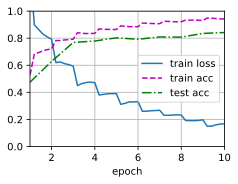

In [22]:
train_with_data_aug(train_augs, test_augs, net)

loss 0.066, train acc 0.977, test acc 0.820
1466.6 examples/sec on [device(type='cuda', index=0)]


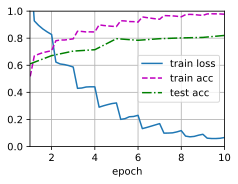

In [28]:
train_with_data_aug(test_augs, test_augs, net)
# overfiting 更加严重，

- 所以简简单单翻转一下，就能降低过拟合的程度。 图片增广，可以减小训练精度与测试精度之间的gap，
- 甚至在有些情况下（如训练ImageNet时），在极致增广下，测试精度会低于测试精度

- Q：如果原始样本足够多，是不是不用做增广
- A：图片多，不代表图片的多样性好。如果样本的多样性能够覆盖测试样本的所有情况，则ok

- 做完增广后，数据的分布不会改变，因为增广没有改变均值，但会让方差变大一点（随机剪裁）

- 增量学习：incremental learning
    - 每一次部署后，把分类错的样本，重新标记，再加入训练集，之后不断的迭代，直到训练集与测试集长得一样

- mixup增广
    - 把两张不一样的图片叠加在一起，把label也叠加在一起
    <img src="./pic/mixup_label.jpg" width=400 height=400>